# Lecture7. Regularization

#### -목차-

[1. 실험환경 구성 (Experimental setting)](#1.-실험환경-구성-(Experimental-setting))  

[2. 데이터 불러오기 (Data loading)](#2.-데이터-불러오기-(Data-loading)) 
>[데이터 로드](#데이터-로드)  
>[학습, 테스트 데이터 분리](#학습,-테스트-데이터-분리)  
    
[3. Linear Regression 모델 구축](#3.-Linear-Regression-모델-구축)  
>[선형회귀 학습](#선형회귀-학습)  

[4. Ridge/Lasso/ElasticNet 모델 구축 및 학습](#4.-Ridge/Lasso/ElasticNet-모델-구축-및-학습)    

[5. lambda(HyperParameter) 튜닝](#5.-lambda(HyperParameter)-튜닝)  
>[Ridge](#Ridge)  
>[Lasso](#Lasso)  
>[ElasticNet](#ElasticNet)  

[6. 각 모델의 solution path 차트](#6.-각-모델의-solution-path-차트)  
>[회귀계수](#회귀계수)  
>[MSE](#MSE)  

[7. 테스트 수행 (예측정확도 비교)](#7.-테스트p수행-(예측정확도-비교))

# 1. 실험환경 구성 (Experimental setting)

In [33]:
# 라이브러리 로드 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mglearn #  mglearn에서 제공하는 Boston 주택가격 Dataset을 이용하기위해 import
from sklearn.model_selection import train_test_split # train set과 test set 분리
from sklearn.metrics import mean_squared_error # MSE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 불러오기 (Data loading)

## 데이터 로드

In [6]:
X, y = mglearn.datasets.load_extended_boston()

## 학습, 테스트 데이터 분리

In [7]:
seed = 0 # 랜덤 시드 설정

# 학습, 테스트 데이터 분리 (0.8:0.2)
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=seed, test_size=0.2)

In [8]:
print("x_train : ", x_train.shape)
print("x_test : ", x_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

x_train :  (404, 104)
x_test :  (102, 104)
y_train :  (404,)
y_test :  (102,)


# 3. Linear Regression 모델 구축

## 선형회귀 학습

In [9]:
base_lr = LinearRegression() # 선형회귀 모델 생성
base_lr.fit(x_train, y_train) # 학습데이터로 모델 학습 

LinearRegression()

# 4. Ridge/Lasso/ElasticNet 모델 구축 및 학습

In [11]:
# alpha : 규제계수
# l1_ratio : ElasticNet에서 L1규제 비율

ridge = Ridge() # defualt (alpha=1) 
ridge.fit(x_train, y_train)

lasso = Lasso() # deafualt (alpha=1)
lasso.fit(x_train, y_train)

elnet = ElasticNet() # default (alpha=1, l1_ratio=0.5)
elnet.fit(x_train, y_train)

print("Ridge training score : {0:.4f}".format(ridge.score(x_train, y_train)))
print("Lasso training score : {0:.4f}".format(lasso.score(x_train, y_train)))
print("ElasticNet training score : {0:.4f}".format(elnet.score(x_train, y_train)))

Ridge training score : 0.8858
Lasso training score : 0.3017
ElasticNet training score : 0.3329


>labmda를 default로 학습했을 때, training dataset에 대한 모델의 결정계수는 Ridge모델이 가장 높은 편

# 5. lambda(HyperParameter) 튜닝

lambda : 규제계수 (alpha)

In [12]:
alphas = [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]

## Ridge

In [14]:
df_ridge_coeff = pd.DataFrame()
ridge_mse = list()

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    ridge_mse.append(mse)
    score_train = ridge.score(x_train, y_train) # 훈련set에 대한 결정계수
    score_test = ridge.score(x_test, y_test) # 테스트set에 대한 결정계수

    print("alpha : {0:<5},  training set score:{1:.3f}   test set score:{2:.3f}   mse:{3:.3f}".format(alpha, score_train, score_test, mse))
   
    df_ridge_coeff['alpha:'+str(alpha)] = pd.Series(data=ridge.coef_)
    
df_ridge_coeff
    

alpha : 0    ,  training set score:0.949   test set score:0.613   mse:31.474
alpha : 0.001,  training set score:0.948   test set score:0.632   mse:29.959
alpha : 0.01 ,  training set score:0.942   test set score:0.687   mse:25.514
alpha : 0.1  ,  training set score:0.926   test set score:0.746   mse:20.652
alpha : 0.5  ,  training set score:0.903   test set score:0.739   mse:21.240
alpha : 1    ,  training set score:0.886   test set score:0.721   mse:22.682
alpha : 5    ,  training set score:0.826   test set score:0.639   mse:29.392
alpha : 10   ,  training set score:0.793   test set score:0.589   mse:33.493


,alpha:0,alpha:0.001,alpha:0.01,alpha:0.1,alpha:0.5,alpha:1,alpha:5,alpha:10
0,-4.901598e+02,-22.388930,-4.950456,-2.814862,-1.776695,-1.517684,-1.078191,-0.846596
1,-4.162787e+01,-21.258102,-9.846929,-5.894476,-2.831843,-1.658541,0.308289,0.698887
2,-1.285780e+02,-82.072689,-31.318836,-6.933491,-2.027529,-1.388030,-0.847508,-0.749726
3,-4.394125e+14,-9.948983,-6.948492,-0.291165,0.021724,-0.025527,0.245859,0.396192
4,-7.267888e+00,-7.358493,-3.271947,1.889559,0.677221,0.039914,-0.708207,-0.706695
...,...,...,...,...,...,...,...,...
99,2.841903e+01,15.241964,4.543596,-1.314416,-2.736199,-2.564528,-2.016887,-1.859909
100,1.046938e+01,8.087525,6.521012,3.044546,0.508937,-0.440338,-1.808455,-2.041599
101,-1.484455e+00,-2.226614,-1.739120,1.457560,1.482358,0.917013,0.826081,0.990098
102,1.418321e+00,-0.819816,-4.767534,-7.124767,-6.948009,-6.509466,-4.904741,-4.045035


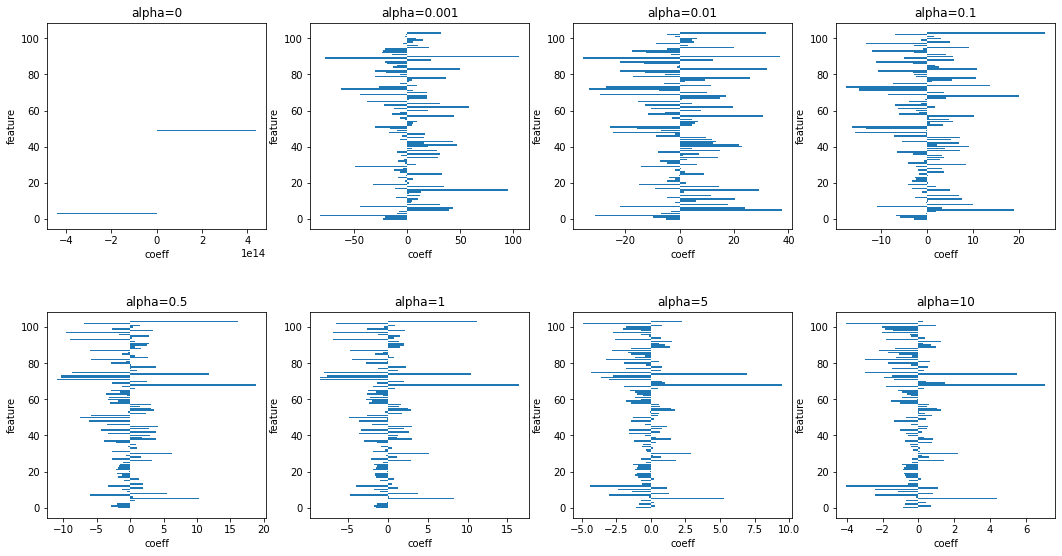

In [15]:
# alpha별 coff dataframe을 barchart로 시각화
plt.figure(figsize=(7,5)) # plot크기 설정

for index, alpha in enumerate(alphas):
    plt.subplot(2,4,index+1)
    plt.barh(df_ridge_coeff.sort_values('alpha:'+str(alpha), ascending=False).reset_index()['index'], df_ridge_coeff.sort_values('alpha:'+str(alpha) ,ascending=False)['alpha:'+str(alpha)])
    plt.title("alpha="+str(alpha)) #제목
    plt.xlabel('coeff') #x축 라벨
    plt.ylabel('feature') #y축 라벨

plt.subplots_adjust(left=2, right=4, top=1.5, hspace=0.4) #subplot간 간격 조절

>Ridge의 경우, alpha=0.1에서 최적

## Lasso

In [34]:
df_lasso_coeff = pd.DataFrame()
lasso_mse = list()

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    lasso_mse.append(mse)
    score_train = lasso.score(x_train, y_train) # 훈련set에 대한 결정계수
    score_test = lasso.score(x_test, y_test) # 테스트set에 대한 결정계수
    
    print("alpha : {0:<5},  training set score:{1:.3f}   test set score:{2:.3f}   mse:{3:.3f}".format(alpha, score_train, score_test, mse))
    
    df_lasso_coeff['alpha:'+str(alpha)] = pd.Series(data=lasso.coef_)
    
df_lasso_coeff
    

alpha : 0    ,  training set score:0.940   test set score:0.690   mse:25.228
alpha : 0.001,  training set score:0.932   test set score:0.740   mse:21.205
alpha : 0.01 ,  training set score:0.894   test set score:0.737   mse:21.388
alpha : 0.1  ,  training set score:0.773   test set score:0.579   mse:34.295
alpha : 0.5  ,  training set score:0.618   test set score:0.448   mse:44.951
alpha : 1    ,  training set score:0.302   test set score:0.186   mse:66.315
alpha : 5    ,  training set score:0.000   test set score:-0.002   mse:81.582
alpha : 10   ,  training set score:0.000   test set score:-0.002   mse:81.582


,alpha:0,alpha:0.001,alpha:0.01,alpha:0.1,alpha:0.5,alpha:1,alpha:5,alpha:10
0,-49.647369,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0
1,-12.913726,-11.557603,-0.000000,0.0,0.0,0.0,0.0,0.0
2,-7.790428,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0
3,-8.292532,-0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,-8.421566,0.204212,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...
99,13.203300,0.862950,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0
100,14.176188,1.426271,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0
101,-1.635929,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
102,-10.061951,-8.076671,-8.186099,-0.0,-0.0,-0.0,-0.0,-0.0


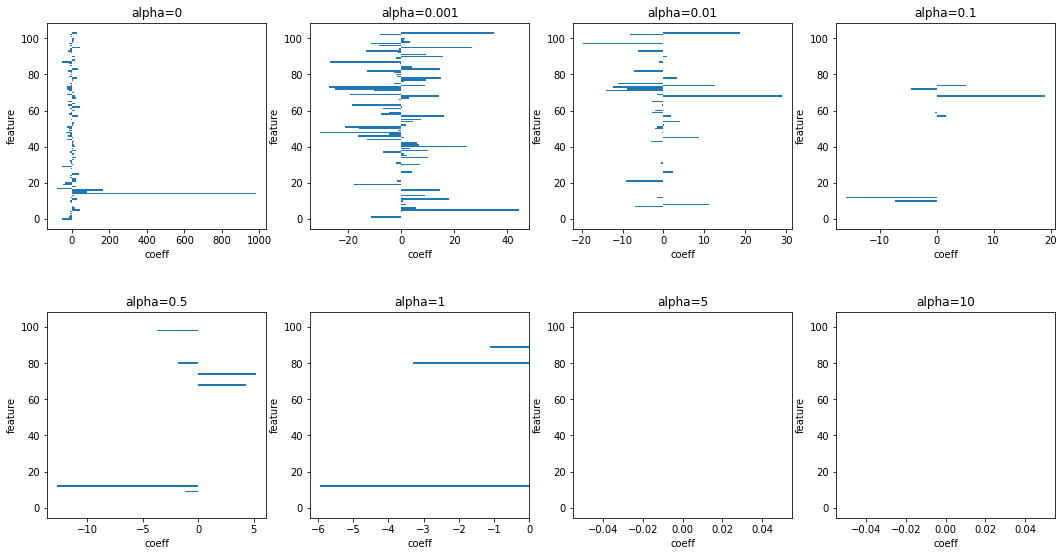

In [35]:
# alpha별 coff dataframe을 barchart로 시각화
plt.figure(figsize=(7,5)) # plot크기 설정

for index, alpha in enumerate(alphas):
    plt.subplot(2,4,index+1)
    plt.barh(df_lasso_coeff.sort_values('alpha:'+str(alpha), ascending=False).reset_index()['index'], df_lasso_coeff.sort_values('alpha:'+str(alpha) ,ascending=False)['alpha:'+str(alpha)])
    plt.title("alpha="+str(alpha)) #제목
    plt.xlabel('coeff') #x축 라벨
    plt.ylabel('feature') #y축 라벨

plt.subplots_adjust(left=2, right=4, top=1.5, hspace=0.4) #subplot간 간격 조절

> Lasso의 경우, alpha=0.01에서 최적

## ElasticNet

In [36]:
df_elnet_coeff = pd.DataFrame()
elnet_mse =  list()

for alpha in alphas:
    elnet = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elnet.fit(x_train, y_train)
    y_pred = elnet.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    elnet_mse.append(mse)

    score_train = elnet.score(x_train, y_train) # 훈련set에 대한 결정계수
    score_test = elnet.score(x_test, y_test) # 테스트set에 대한 결정계수

    print("alpha : {0:<5},  training set score:{1:.3f}   test set score:{2:.3f}   mse:{3:.3f}".format(alpha, score_train, score_test, mse))
        
    df_elnet_coeff['alpha:'+str(alpha)] = pd.Series(data=elnet.coef_)
    
df_elnet_coeff
    

alpha : 0    ,  training set score:0.940   test set score:0.690   mse:25.228
alpha : 0.001,  training set score:0.917   test set score:0.751   mse:20.270
alpha : 0.01 ,  training set score:0.854   test set score:0.681   mse:25.974
alpha : 0.1  ,  training set score:0.722   test set score:0.486   mse:41.864
alpha : 0.5  ,  training set score:0.501   test set score:0.284   mse:58.297
alpha : 1    ,  training set score:0.333   test set score:0.183   mse:66.513
alpha : 5    ,  training set score:0.000   test set score:-0.002   mse:81.582
alpha : 10   ,  training set score:0.000   test set score:-0.002   mse:81.582


,alpha:0,alpha:0.001,alpha:0.01,alpha:0.1,alpha:0.5,alpha:1,alpha:5,alpha:10
0,-49.647369,-2.634975,-1.325033,-0.108137,-0.000000,-0.000000,-0.0,-0.0
1,-12.913726,-2.642147,-0.199973,0.544191,0.373871,0.122759,0.0,0.0
2,-7.790428,-4.724807,-0.360960,-0.611324,-0.558044,-0.374256,-0.0,-0.0
3,-8.292532,0.000000,0.029182,0.593658,0.202955,0.000000,0.0,0.0
4,-8.421566,1.132886,-0.098674,-0.156460,-0.111108,-0.039167,-0.0,-0.0
...,...,...,...,...,...,...,...,...
99,13.203300,-2.157281,-1.886117,-1.224570,-0.301320,-0.000000,-0.0,-0.0
100,14.176188,1.044576,-1.048845,-2.060645,-1.128322,-0.568641,-0.0,-0.0
101,-1.635929,2.047886,0.468164,0.996171,0.403849,0.062398,0.0,0.0
102,-10.061951,-6.927210,-5.800696,-2.877192,-0.995842,-0.370701,-0.0,-0.0


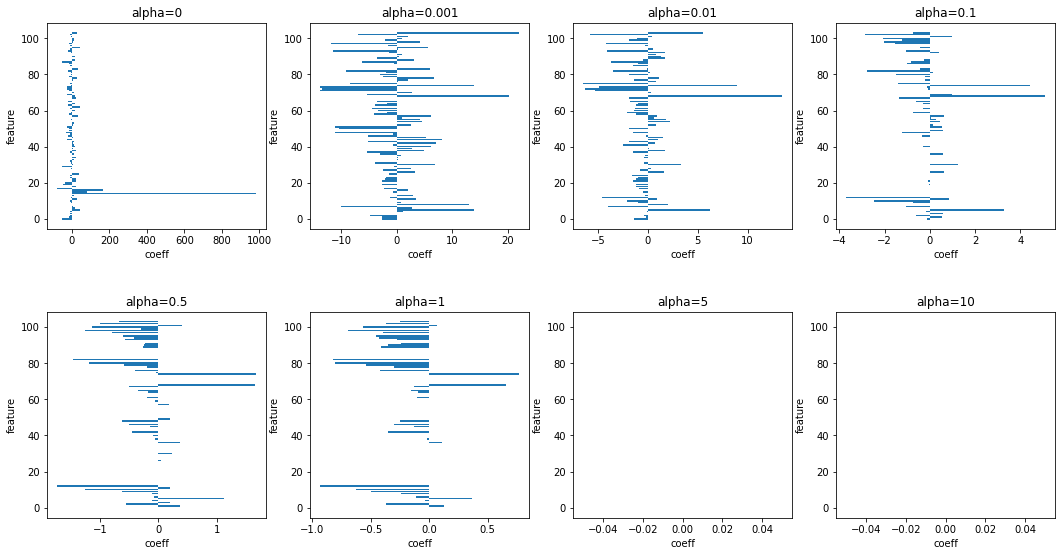

In [37]:
# alpha별 coff dataframe을 barchart로 시각화
plt.figure(figsize=(7,5)) # plot크기 설정

for index, alpha in enumerate(alphas):
    plt.subplot(2,4,index+1)
    plt.barh(df_elnet_coeff.sort_values('alpha:'+str(alpha), ascending=False).reset_index()['index'], df_elnet_coeff.sort_values('alpha:'+str(alpha) ,ascending=False)['alpha:'+str(alpha)])
    plt.title("alpha="+str(alpha)) #제목
    plt.xlabel('coeff') #x축 라벨
    plt.ylabel('feature') #y축 라벨

plt.subplots_adjust(left=2, right=4, top=1.5, hspace=0.4) #subplot간 간격 조절

> ElasticNet의 경우, alpha=0.001에서 최적

# 6. 각 모델의 solution path 차트

## 회귀계수

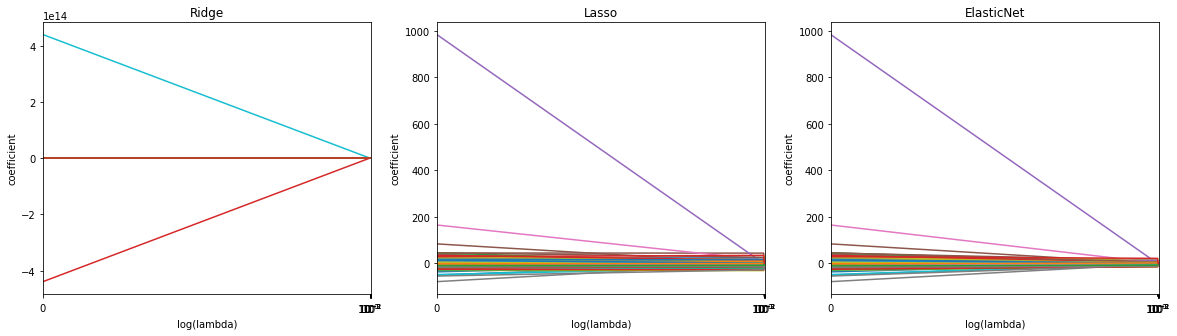

In [25]:
plt.figure(figsize=(20,5)) # plot크기 설정

# Ridge 
df_ridge_coeff.columns=alphas
plt.subplot(1,3,1)
plt.semilogx(df_ridge_coeff.T)
plt.xticks(alphas)
plt.xlabel('log(lambda)')
plt.ylabel('coefficient')
plt.title('Ridge')

# Lasso 
df_lasso_coeff.columns=alphas
plt.subplot(1,3,2)
plt.semilogx(df_lasso_coeff.T)
plt.xticks(alphas)
plt.xlabel('log(lambda)')
plt.ylabel('coefficient')
plt.title('Lasso')

# ElasticNet
df_elnet_coeff.columns=alphas
plt.subplot(1,3,3)
plt.semilogx(df_elnet_coeff.T)
plt.xticks(alphas)
plt.xlabel('log(lambda)')
plt.ylabel('coefficient')
plt.title('ElasticNet')

#plt.legend(df_elnet_coeff.index, loc='best') # 범례

plt.show()

## MSE

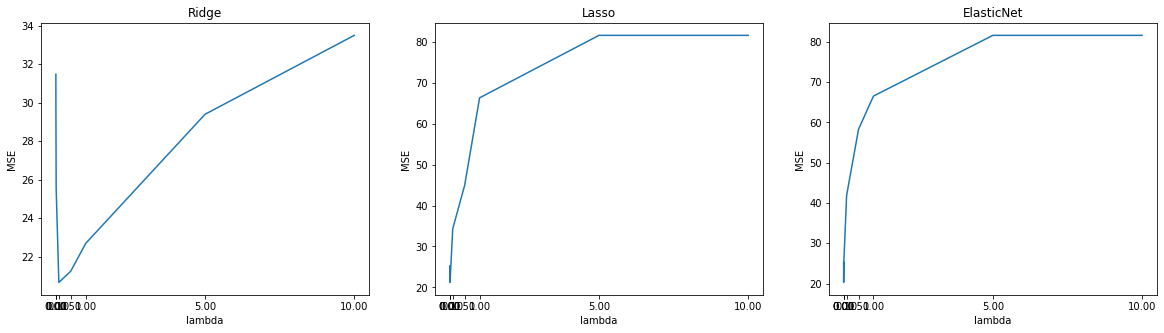

In [30]:
plt.figure(figsize=(20,5)) # plot크기 설정

# Ridge 
plt.subplot(1,3,1)
plt.plot(alphas, ridge_mse)
plt.xticks(alphas)
plt.xlabel('lambda')
plt.ylabel('MSE')

plt.title('Ridge')

# Lasso 
df_lasso_coeff.columns=alphas
plt.subplot(1,3,2)
plt.plot(alphas, lasso_mse)
plt.xticks(alphas)
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('Lasso')

# ElasticNet
df_elnet_coeff.columns=alphas
plt.subplot(1,3,3)
plt.plot(alphas, elnet_mse)
plt.xticks(alphas)
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('ElasticNet')

#plt.legend(df_elnet_coeff.index, loc='best') # 범례

plt.show()

>Ridge의 경우, Lasso와 ElasticNet에 비해 alpha가 커져도 MSE가 크게 커지지 않는 편

# 7. 테스트 수행 (예측정확도 비교)

In [38]:
# 최적의 lambda로 학습 수행
ridge =  Ridge(alpha=0.1).fit(x_train, y_train)
lasso = Lasso(alpha=0.01).fit(x_train, y_train)
elnet = ElasticNet(alpha=0.001).fit(x_train, y_train)

# test set에 대해 예측 수행
y_pred_base = base_lr.predict(x_test)
y_pred_ridge = ridge.predict(x_test)
y_pred_lasso = lasso.predict(x_test)
y_pred_elnet = elnet.predict(x_test)

# MSE 
mse_base = mean_squared_error(y_test, y_pred_base)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_elnet = mean_squared_error(y_test, y_pred_elnet)

In [39]:
print("[MSE]  ")
print("base MSE : %.3f" % mse_base)
print("Ridge MSE : %.3f"% mse_ridge)
print("Lasso MSE : %.3f"% mse_lasso)
print("ElasticNet MSE :%.3f" % mse_elnet)

print()
print("[모델 결정계수]  ")
print("base score : %.4f" % base_lr.score(x_test,y_test))
print("Ridge score : %.4f"% ridge.score(x_test,y_test))
print("Lasso score : %.4f"% lasso.score(x_test,y_test))
print("ElasticNet score : %.4f" % elnet.score(x_test,y_test))


[MSE]  
base MSE : 31.278
Ridge MSE : 20.652
Lasso MSE : 21.388
ElasticNet MSE :20.270

[모델 결정계수]  
base score : 0.6159
Ridge score : 0.7464
Lasso score : 0.7373
ElasticNet score : 0.7511


> Base모델 대비 정규화된 모델(Regularized models) 모두 예측 오차(MSE)가 훨씬 작은 것을 알 수 있다.  <br>
예측성능이 가장 높은 순서(오차가 적은 순서)는 ElasticNet>Ridge>Lasso>Base 순이다. <br>
Lasso는 변수를 선택하는 메카니즘으로, 다른 두 정규화모델보다 예측성능은 떨어질 수 있지만 반대로 해석적인 측면에서 장점이 있다.